<h2 align="center"> <u>SALUD MENTAL EN EL MUNDO LABORAL</u>


*"Mens sana in corpore sano"*. Esta clásica cita, aunque bien conocida, no puede ser más fiel a la realidad. La salud mental, a medida que pasan los años, va tomando poco a poco la importancia y la atención que se merece, especialmente en el contexto laboral donde las exigencias pueden generar situaciones de estrés, ansiedad o malestar psicológico. A pesar de su importancia, sigue existiendo un estigma significativo en torno a los problemas de salud mental, lo que dificulta su identificación temprana y el acceso a recursos de apoyo.

En este trabajo abordaremos la construcción de un modelo predictivo capaz de anticipar si una persona podría requerir tratamiento de salud mental a partir de las respuestas proporcionadas en una encuesta anónima y con una estructura fija y fácil de replicar. El objetivo es identificar patrones relevantes y variables clave que permitan caracterizar los factores más influyentes en la necesidad de atención psicológica, y hacerlo de forma transparente, medible y basada en datos.

Para ello, seguiremos un proceso exhaustivo y detallado que incluye análisis exploratorio de datos (EDA), preprocesamiento de datos, entrenamiento de distintos algoritmos de clasificación, optimización de modelos, selección de variables por importancia y técnicas específicas de interpretabilidad. Finalmente, construiremos un modelo optimizado que, entrenado con los datos disponibles, podría utilizarse como herramienta predictiva en contextos similares en el futuro.

El enfoque adoptado combina rigor técnico con sensibilidad social, mostrando cómo el uso responsable del aprendizaje automático puede aportar valor en áreas tan críticas como el bienestar psicológico de las personas.

---
---

## 0.- Importaciones

En primer lugar, realizamos la importación de las principales librerías y establecemos algunos settings que queremos dejar por defecto para todo el notebook. Iremos añadiendo más módulos a medida que los vayamos necesitando.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Añadimos la carpeta "utils" al path para poder importar nuestros módulos propios
sys.path.append("./src/utils")

import toolbox_ML as tb
import bootcampviztools as bt

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

---
---

## 1.- Carga y primera visualización

Ahora, leemos el dataframe en el que almacenamos los datos, realizamos una copia que será sobre la que trabajaremos, y echamos un primer vistazo a los datos.

In [2]:
df_original = pd.read_csv("./src/data_sample/survey.csv")
df_modificable = df_original.copy()

df_original.columns = df_original.columns.str.lower()
df_modificable.columns = df_modificable.columns.str.lower()

In [3]:
display(df_modificable)

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [4]:
print(df_modificable.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   timestamp                  1259 non-null   object
 1   age                        1259 non-null   int64 
 2   gender                     1259 non-null   object
 3   country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

---
---

## 2.- Tipificación y descripción de variables

Para tener una buena idea inicial vamos a verificar cardinalidad, valores únicos... y a obtener una primera tipificación de las variables:

In [5]:
display(tb.describe_df(df_modificable))

,timestamp,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
DATA_TYPE,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
MISSINGS (%),0.0,0.0,0.0,0.0,40.905481,1.429706,0.0,0.0,20.969023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.973789
UNIQUE_VALUES,1246,53,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
CARDIN (%),98.97,4.21,3.89,3.81,3.57,0.16,0.16,0.16,0.32,0.48,0.16,0.16,0.24,0.24,0.24,0.24,0.24,0.4,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.16,12.71


In [6]:
display(tb.tipifica_variables(df_modificable))

,nombre_variable,tipo_sugerido
0,timestamp,Numerica Continua
1,age,Numerica Discreta
2,gender,Numerica Discreta
3,country,Numerica Discreta
4,state,Numerica Discreta
5,self_employed,Binaria
6,family_history,Binaria
7,treatment,Binaria
8,work_interfere,Categorica
9,no_employees,Categorica


Para conocer mejor el caso que estamos tratando y tomar mejores decisiones en la limpieza, tratamiento y posterior selección de features, hagamos una breve descripción de las variables:

| Variable                     | Descripción                                                                |
|------------------------------|----------------------------------------------------------------------------|
| `timestamp`                  | Fecha y hora en que se completó la encuesta.                               |
| `age`                        | Edad del encuestado.                                                       |
| `gender`                     | Género del encuestado.                                                     |
| `country`                    | País de residencia del encuestado.                                         |
| `state`                      | Estado de EE.UU. (si aplica).                                              |
| `self_employed`              | Si el encuestado trabaja por cuenta propia (binaria).                      |
| `family_history`             | Si tiene antecedentes familiares de salud mental (binaria).                |
| `treatment`                  | Si ha recibido tratamiento por salud mental (binaria)(target).             |
| `work_interfere`             | Grado en que los problemas mentales interfieren en el trabajo categorizado en *Never, Rarely,   Sometimes, Often*.                                                                                          |
| `no_employees`               | Número de empleados en la empresa en rangos de [1-5], [6-25], [26-100], [100-500], [500-1000], 1000+                                                                                                       |
| `remote_work`                | Si trabaja de forma remota (binaria).                                      |
| `tech_company`               | Si trabaja en una empresa tecnológica (binaria).                           |
| `benefits`                   | Si la empresa ofrece cobertura para salud mental (*yes, no, don't know*).    |
| `care_options`               | Si hay opciones de cuidado de salud mental fuera del seguro (*yes, no, don't know*).|
| `wellness_program`           | Si hay programas de bienestar en la empresa (*yes, no, don't know*).         |
| `seek_help`                  | Si se sabe cómo y dónde pedir ayuda (*yes, no, don't know*).                 |
| `anonymity`                  | Si el anonimato está garantizado al usar servicios de salud mental (*yes, no, don't know*).|
| `leave`                      | Comodidad al pedir baja médica por salud mental categorizado en *Don't know, Very easy, Somewhat easy, Somewhat difficult, Very difficult.*                                                          |
| `mental_health_consequence`  | Consecuencias percibidas por problemas mentales en el trabajo (*yes, no, maybe*).|
| `phys_health_consequence`    | Consecuencias percibidas por problemas físicos en el trabajo (*yes, no, maybe*).|
| `coworkers`                  | Comodidad al hablar de salud mental con compañeros (*yes, no, some of them*).|
| `supervisor`                 | Comodidad al hablar de salud mental con supervisores (*yes, no, some of them*).|
| `mental_health_interview`    | Si se hablaría de salud mental en una entrevista (*yes, no, maybe*).       |
| `phys_health_interview`      | Si se hablaría de salud física en una entrevista (*yes, no, maybe*).       |
| `mental_vs_physical`         | Si se cree que la empresa da igual importancia a salud mental y física (*yes, no, don't know*).                                                                                                     |
| `obs_consequence`            | Si ha observado consecuencias negativas en otros por problemas mentales (binaria).|
| `comments`                   | Comentarios adicionales abiertos (texto libre).                            |

---
---

## 3.- Tratamiento y limpieza

En primer lugar, teniendo en cuenta que tenemos el dataset original bien guardado, vamos a ir eliminando algunas columnas de la copia con la que vamos a tratar:

1. `timestamp`\
*Fecha y hora en que se completó la encuesta.*\
La eliminamos pues no proporciona información útil para predecir salud mental. Se trata de un simple registro de cuándo se hicieron las preguntas a los encuestados, no nos aporta nada.

2. `state`\
*Estado de EE.UU. (solo para encuestados de EE.UU.)*\
Tiene 41% de valores nulos, porque solo aplica si el país es USA. Además, tiene una cardinalidad bastante alta, 45 valores distintos. En definitiva, genera más complicaciones que valor explicativo, más aún cuando ya tenemos la variable `country`.

3. `comments`\
*Campo abierto de texto libre al final de la encuesta.*\
Para empezar, solo hay 160 respuestas (~13% del total), puesto que es el típico campo opcional en las encuestas para quien quiera dejar comentarios adicionales. Así, es texto sin estructurar, requeriría un tratamiento muy complicado para sacar algo en claro de aquí, lo cual es mucho trabajo para muy poca muestra. En definitiva, no es viable para el análisis cuantitativo que queremos hacer en ese proyecto, así que eliminándola no perdemos poder predictivo.

In [7]:
df_modificable.drop(columns=["timestamp", "state", "comments"], inplace=True)

Ahora vamos a empezar a limpiar y tratar variables. En primer lugar, al echar un vistazo a `age`, vemos que hay algún valor que es claramente un error o que es incompatible. Así, como son tan pocos estos valores equivocados, y para no imputar nada artificialmente, vamos a quedarnos con las filas cuyas edades están en un rango coherente.

In [8]:
df_modificable = df_modificable[(df_modificable["age"] >= 16) & (df_modificable["age"] <= 80)]

En cuanto a `country`, si observamos sus valores únicos, la muestra está repartida casi en su totalidad entre 10 países que tienen al menos 10 encuestados (de hecho en 5, pero no queremos perder tanta información). Así, vamos a crear una nueva columna en la que dejaremos los 10 países con más datos tal cual y el resto los categorizaremos como *Other*.

In [9]:
# Guardamos la original en una columna indicativa por si queremos probar luego
df_modificable["country_raw"] = df_modificable["country"]

# Guardamos los 10 países con más encuestados
top_10_paises = [
    "United States", "United Kingdom", "Canada", "Germany", "Netherlands",
    "Ireland", "Australia", "France", "India", "New Zealand"
]

# Creamos la nueva columna
df_modificable["country_grouped"] = df_modificable["country"].apply(lambda x: x if x in top_10_paises else "Other")

Ahora vemos que en `gender` hay muchos más valores únicos de los que podríamos esperar. Después de un vistazo a su value counts, podemos simplificar mucho esta columna, separándola en tres categorías, mapeando los valores a mano.

In [10]:
# Limpiamos y transformamos todas las respuestas para que funcione bien nuestro clasificador
df_modificable["gender"] = df_modificable["gender"].str.lower().str.strip()

# Clasificador ayudándonos del value counts de gender
def clasificar_genero(genero):
    if genero in ["male", "m", "man", "cis male", "msle", "mal", "mail", "maile", "make", "guy (-ish) ^_^", "male (cis)", "malr", "cis man"]:
        return "male"
    elif genero in ["female", "f", "woman", "cis female", "femake", "femail", "cis-female/femme", "female (cis)"]:
        return "female"
    else:
        return "other"

df_modificable["gender"] = df_modificable["gender"].apply(clasificar_genero)

En cuanto a las dos columnas con nulos, creo que en este caso lo más coherente es imputar con `Unknown`. Por un lado, no eliminaría filas pues el porcentaje de nulos es bajo, y ya tenemos pocos datos como para seguir quitando información. Además, en el caso de las encuestas, no contestar puede ser informativo en sí mismo. Puede que, por ejemplo, el encuestado sea autónomo y no quiera decirlo. Así que, sabiendo que ya son variables categóricas en sí, sustituyamos los NaN por una nueva categoría `Unknown` que será perfectamente útil e informativa al hacer más adelante el one-hot encoding.

In [11]:
df_modificable["self_employed"] = df_modificable["self_employed"].fillna("Unknown")
df_modificable["work_interfere"] = df_modificable["work_interfere"].fillna("Unknown")

Vamos con `no_employees`. La teníamos categorizada por rangos, por tanto, creo que es natural hacer un codificado a mano, representando cada categoría con un número, manteniendo el orden. Además así evitamos generar en un futuro 6 columnas nuevas, y es útil con modelos que respeten la jerarquía.

In [12]:
orden_empleados = {
    "1-5": 1,
    "6-25": 2,
    "26-100": 3,
    "100-500": 4,
    "500-1000": 5,
    "More than 1000": 6
}
df_modificable["no_employees_encoded"] = df_modificable["no_employees"].map(orden_empleados)

Por último, siguiendo esta misma línea, vamos a transformar tres de las variables categóricas a ordinales (`work_interfere`, `no_employees` y `leave`), puesto que las propias categorías siguen una jerarquía que conviene tener en cuenta. Aunque ya hemos generado `no_employees_encoded` puesto que nos viene mejor más adelante a la hora de modelar, queremos dejar ordenada la columna original por facilidad de visualización a la hora de hacer el EDA.

In [13]:
from pandas.api.types import CategoricalDtype

orden_work_interfere = ["Unknown", "Never", "Rarely", "Sometimes", "Often"]
orden_leave = ["Don't know", "Very easy", "Somewhat easy", "Somewhat difficult", "Very difficult"]
orden_no_employees = ["1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000"]

df_modificable["work_interfere"] = df_modificable["work_interfere"].astype(
    CategoricalDtype(categories=orden_work_interfere, ordered=True)
)

df_modificable["leave"] = df_modificable["leave"].astype(
    CategoricalDtype(categories=orden_leave, ordered=True)
)

df_modificable["no_employees"] = df_modificable["no_employees"].astype(
    CategoricalDtype(categories=orden_no_employees, ordered=True)
)

---
---

## 4.- EDA

### 4.1.- Target

Para empezar vamos a dejar nuestro target `treatment` como binaria 0-1 y a echar un primer vistazo a su distribución:

In [14]:
# Definimos nuestro target y lo transformamos a binaria
target = "treatment"
df_modificable[target] = df_modificable[target].map({"Yes": 1, "No": 0})

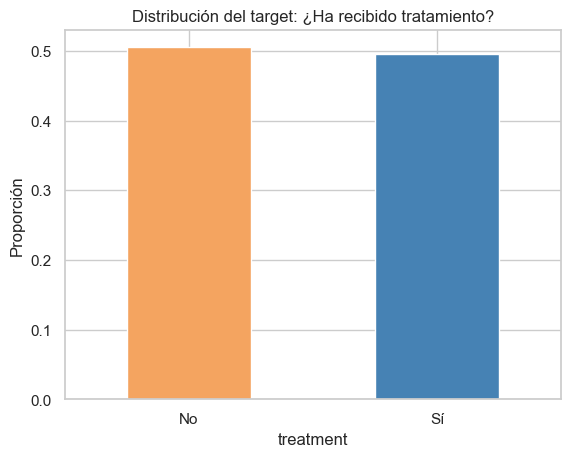

In [15]:
# Pintamos su distribución
df_modificable[target].value_counts(normalize=True).plot(kind="bar", color = ["sandybrown", "steelblue"])
plt.title("Distribución del target: ¿Ha recibido tratamiento?")
plt.xticks(ticks=[0, 1], labels=["No", "Sí"], rotation = 0)
plt.ylabel("Proporción")
plt.show()

Nuestro target está bastante balanceado, hay prácticamente la misma proporción de encuestados que hayan recibido tratamiento por salud mental que que no lo hayan hecho. 

A la hora de modelar, esto es bastante positivo. No necesitaremos técnicas específicas que traten el desbalance de clases, tipo el hiperparámetro `class_weight`, o métodos como SMOTE o undersampling. 

Además, a la hora de predecir, aunque tenemos pocos datos de partida, al estar la muestra repartida entre ambas clases, no habrá sesgo hacia una de ellas y podremos crear un modelo preciso con buen margen de aprendizaje y que no desbalancee.

---

### 4.2- Numéricas

Vamos a centrarnos ahora en la variable `age`, la única numérica en nuestro modelo.

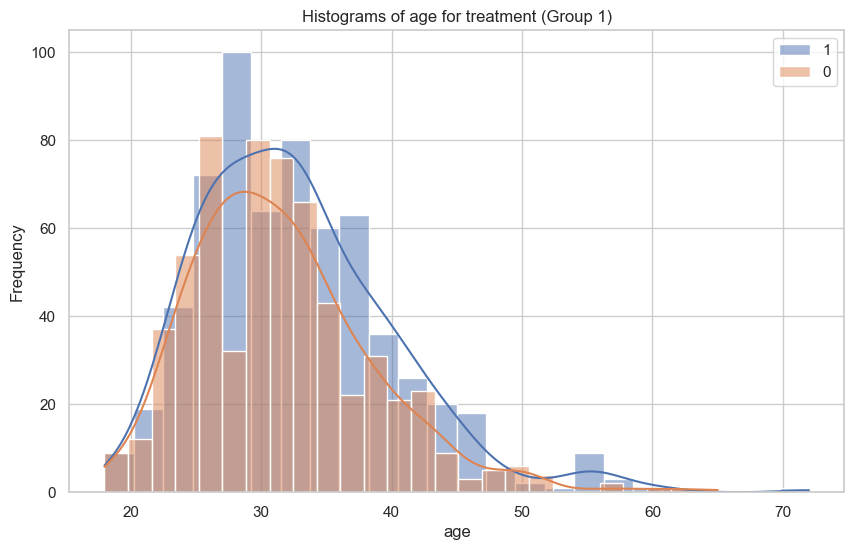

In [16]:
bt.plot_grouped_histograms(df_modificable, cat_col=target, num_col="age", group_size=2)

La curva para tratados tiene su pico ligeramente desplazado hacia la derecha respecto a los no tratados y ambos grupos tienen distribuciones muy similares.

Los tratados tienden a concentrarse un poco más entre los 28 y 38 años. Los no tratados tienen su pico antes, entre 25 y 35 más o menos.

Además, no hay saltos raros, picos extraños ni colas inusuales, la distribución de edades es bastante limpia y coherente.

No haría falta transformarla con un `log` ni nada parecido, pero sí escalarla para usarla en modelos sensibles a la escala.

---

### 4.3.- Categóricas

Ahora es el turno de las categóricas. Como hay tantas, vamos a hacerlo por bloques.

**Bloque 1: Variables descriptivas personales**

 En primer lugar, las variables más puramente descriptivas del contexto de cada encuestado. Estas son `country`, `gender`, `self_employed`, `family_history`.

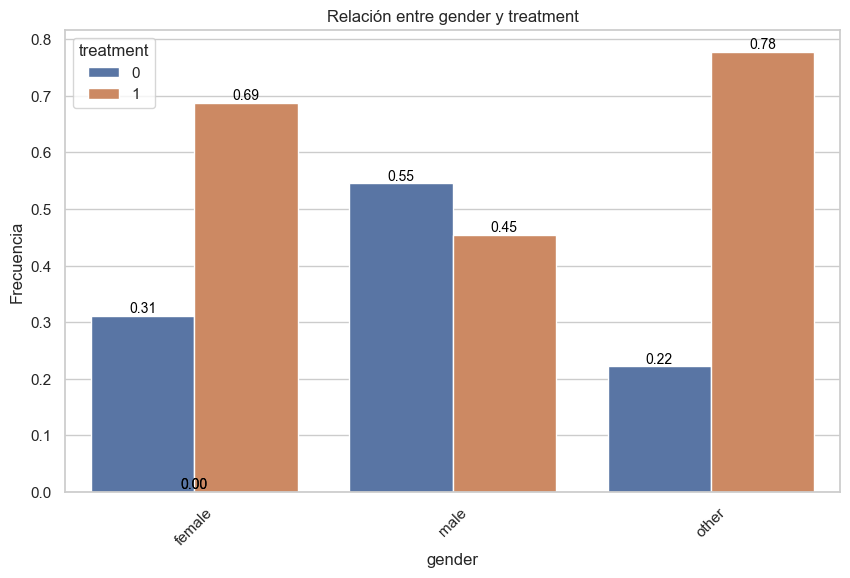

In [17]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="gender", cat_col2="treatment", relative_freq=True, show_values=True)

`gender`\
Las mujeres y sobre todo los géneros no binarios tienen mayor proporción de tratamiento. Parece ser bastante interesante para incluirla.

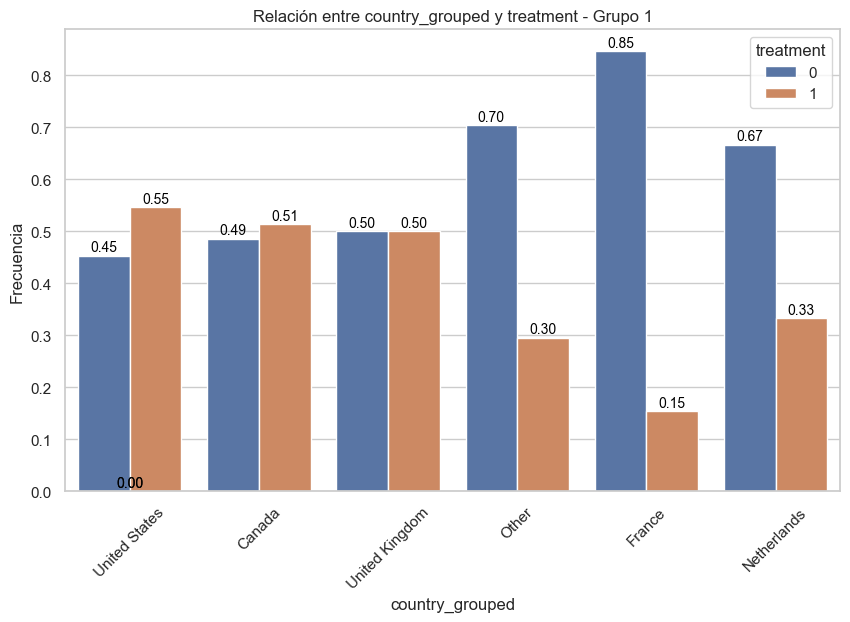

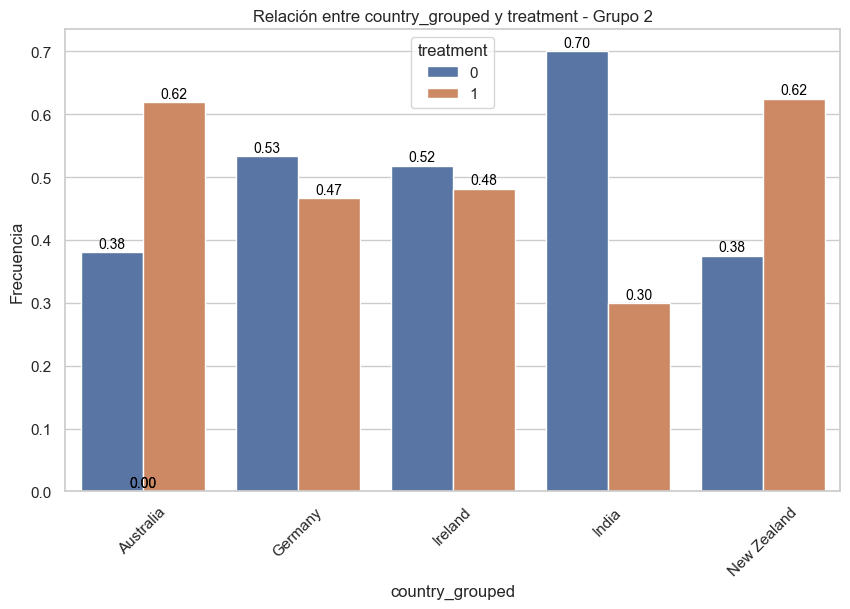

In [18]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="country_grouped", cat_col2="treatment", relative_freq=True, show_values=True, size_group=6)

`country_grouped`\
Aunque en muchos países, sobre todo los top 3, está bastante equilibrada la distribución, creo que puede ser interesante incluir el país buscando una correlación entre el target y el contexto cultural. Podemos probar con y sin ella.

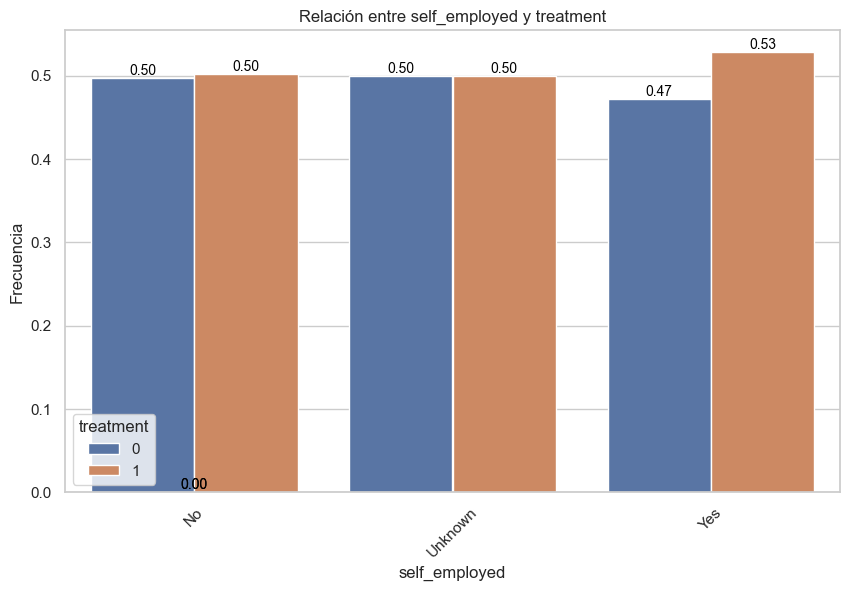

In [19]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="self_employed", cat_col2="treatment", relative_freq=True, show_values=True)

`self_employed`\
Está bastante repartida la proporción, no parece haber diferencias claras. Quizás no aporte demasiado incluirla en el modelo.

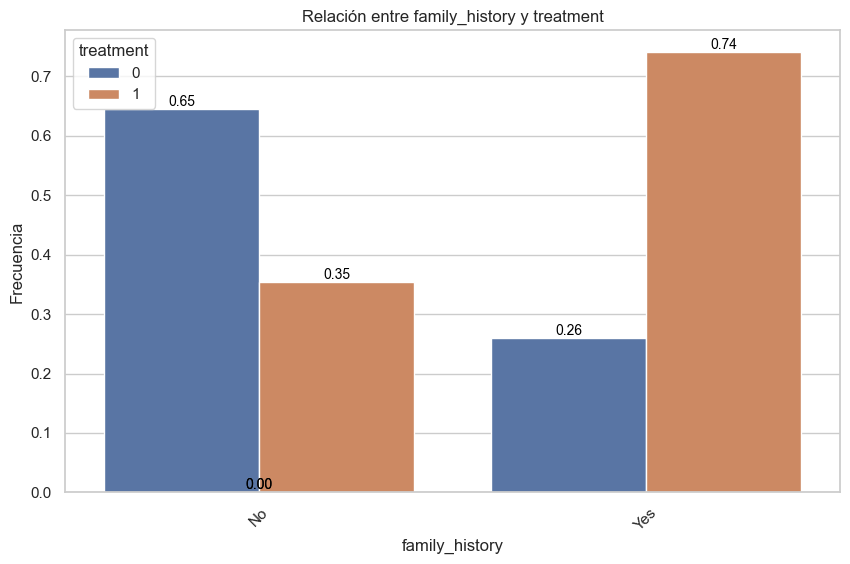

In [20]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="family_history", cat_col2="treatment", relative_freq=True, show_values=True)

`family_history`\
Esta variable, como podríamos esperar, es muy fuerte como predictora. Parece haber una relación directa entre tener familiares que hayan recibido tratamiento por salud mental y que lo haya recibido el encuestado.

---

**Bloque 2: Variables laborales y estructurales**

Este grupo nos puede dar información sobre si el tipo de empresa o las condiciones laborales influyen en la probabilidad de recibir tratamiento.

Se tratan de: `work_interfere`, `no_employees`, `remote_work` y `tech_company`.

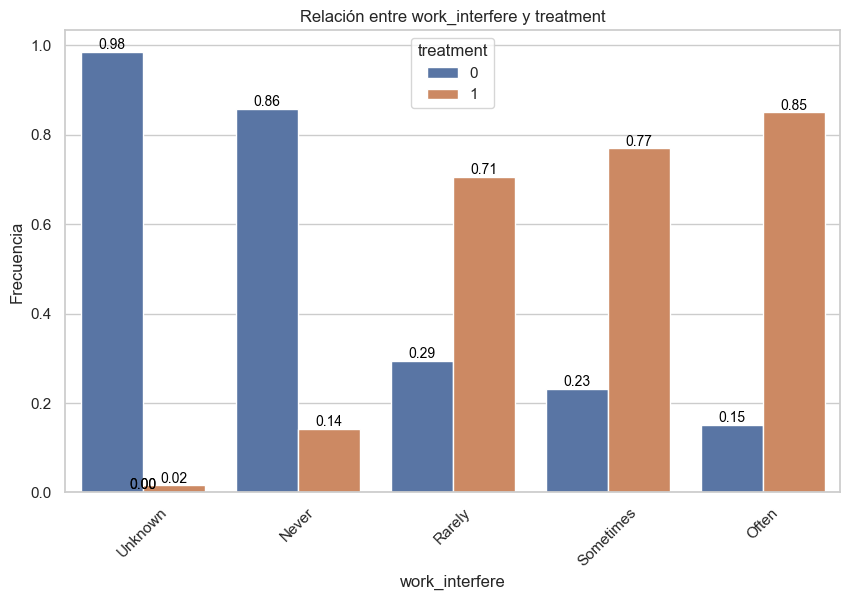

In [21]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="work_interfere", cat_col2="treatment", relative_freq=True, show_values=True)

`work_interfere`\
En este caso hay un patrón clarísimo: cuanto más interfiere la salud mental en el trabajo, más probable es que la persona haya recibido tratamiento.

En cuanto a la categoría *Unknown*, el 98% no han recibido tratamiento, luego podríamos casi que directamente interpretarla como no tener problemas o no querer decirlo.

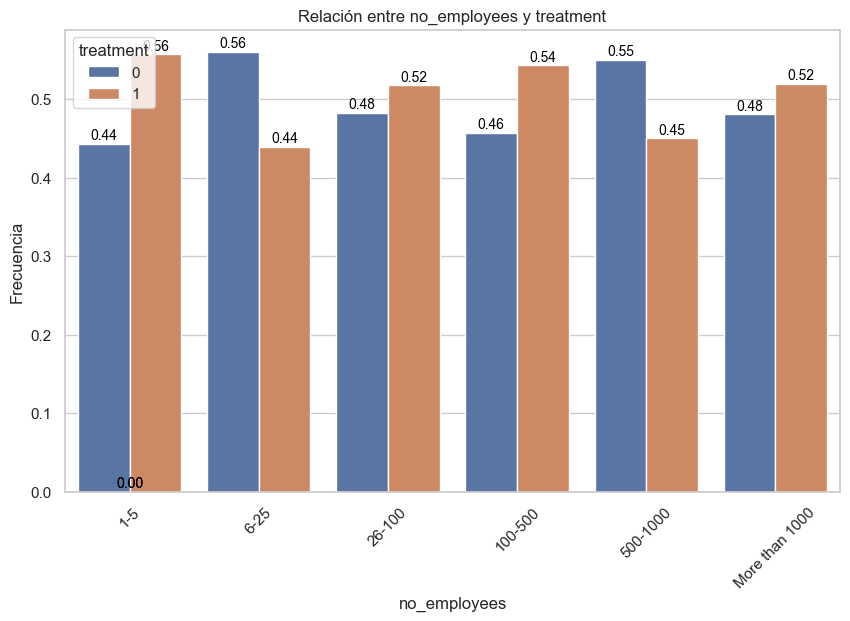

In [22]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="no_employees", cat_col2="treatment", relative_freq=True, show_values=True, size_group=6)

`no_employees`\
No hay un patrón claro ni lineal, las diferencias son bastante pequeñas, oscilando entre 44% y 56% de tratamiento, es decir, parece que el efecto de esta variable es bastante leve. Tanto empresas muy pequeñas como las más grandes tienen proporciones equilibradas de tratamiento por salud mental en sus empleados. No parece muy significativa, pero quizás la incluyamos, puesto que al ser ordinal no introducimos muchas columnas al modelar.

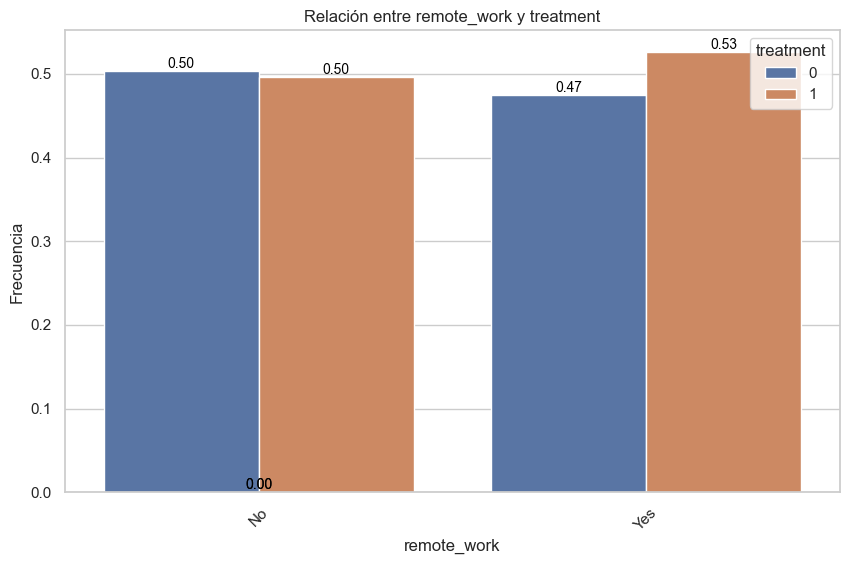

In [23]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="remote_work", cat_col2="treatment", relative_freq=True, show_values=True)

`remote_work`\
Estamos en la misma situación que antes. La distribución esta prácticamente clavada en un 50% en ambos casos. No parece que vaya a aportar mucho en nuestro modelo. 

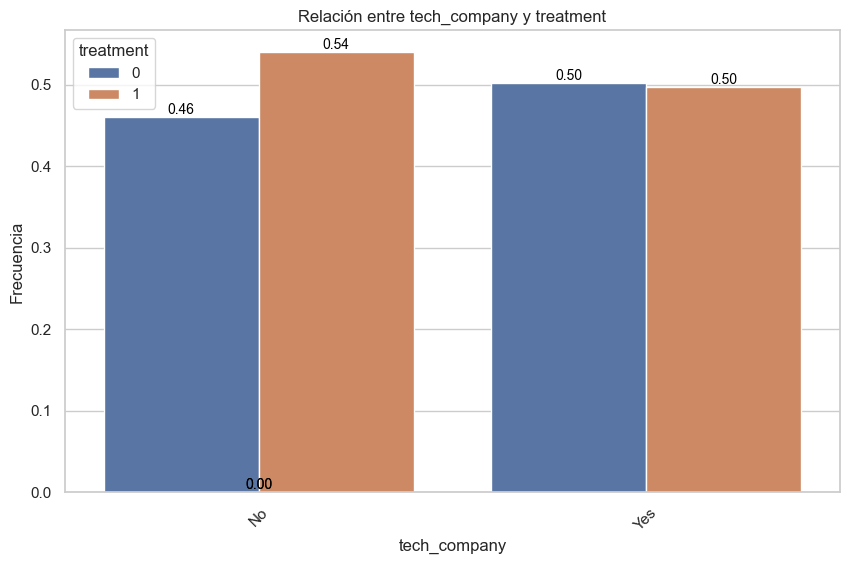

In [24]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="tech_company", cat_col2="treatment", relative_freq=True, show_values=True)

`tech_company`\
No parece haber una correlación clara entre que la empresa sea tecnológica o no y que sus trabajadores hayan recibido tratamiento.

---

**Bloque 3: Cultura de apoyo y recursos ofrecidos por la empresa**

A priori este bloque debería tener un gran valor predictivo y social. Analizaremos las variables `benefits`, `care_options`, `wellness_program`, `seek_help`, y `anonymity`.

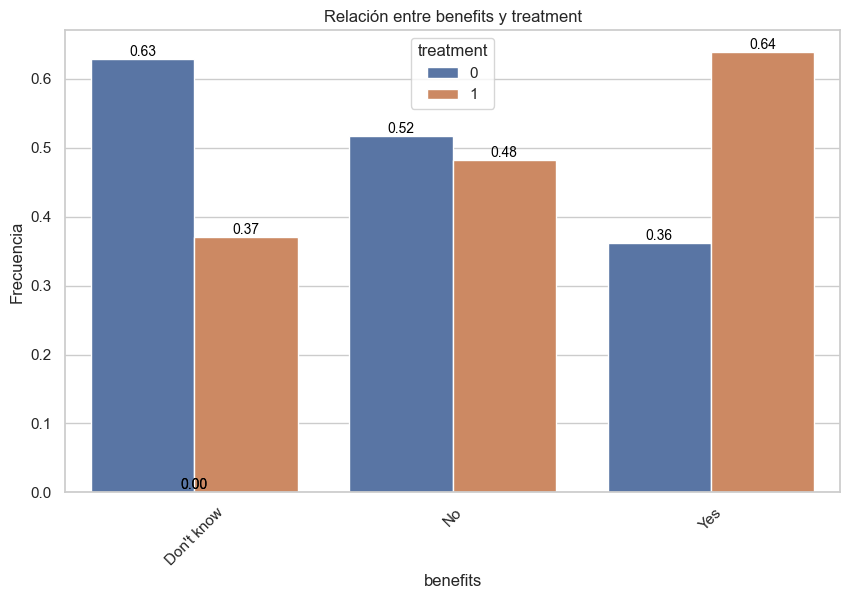

In [25]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="benefits", cat_col2="treatment", relative_freq=True, show_values=True)

`benefits`\
Vemos que hay una relación clara y creciente:
- Si el trabajador sabe que sí hay beneficios, hay más probabilidad de tratamiento.
- Si no los hay, baja al 48%.
- Si no lo sabe, es incluso peor, solo 37% tratados.

Da la sensación de que la información y claridad sobre el acceso a recursos también influye bastante en si el encuestado ha recibido tratamiento o no.

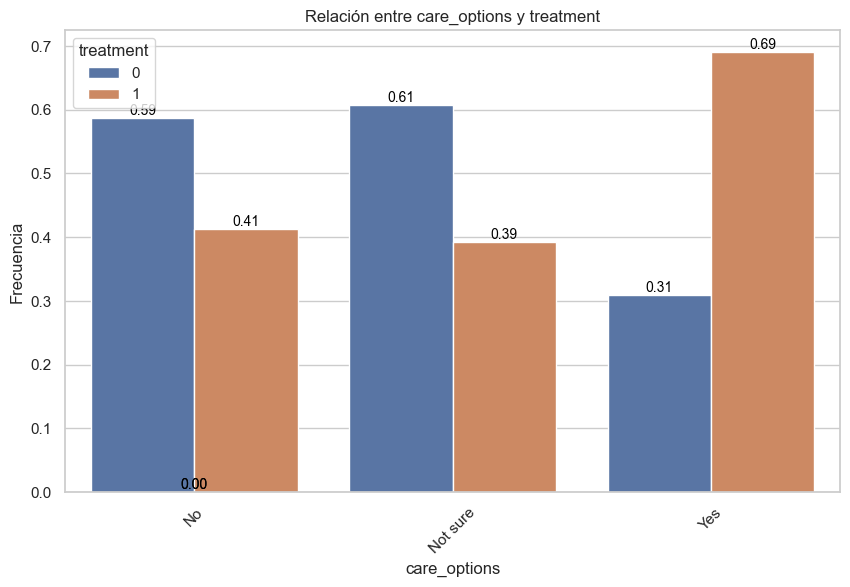

In [26]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="care_options", cat_col2="treatment", relative_freq=True, show_values=True)

`care_options`\
Claramente, saber que hay opciones de cuidado alternativas (aunque no estén cubiertas por el seguro) incrementa muchísimo la probabilidad de recibir tratamiento. Y es que las personas que dicen *No* o *Not sure* están muy por debajo en tasa de tratamiento (~40%) frente a la categoría *Yes*, que destaca fuertemente con 69% tratados. Parece una vez más una variable a tener en cuenta.

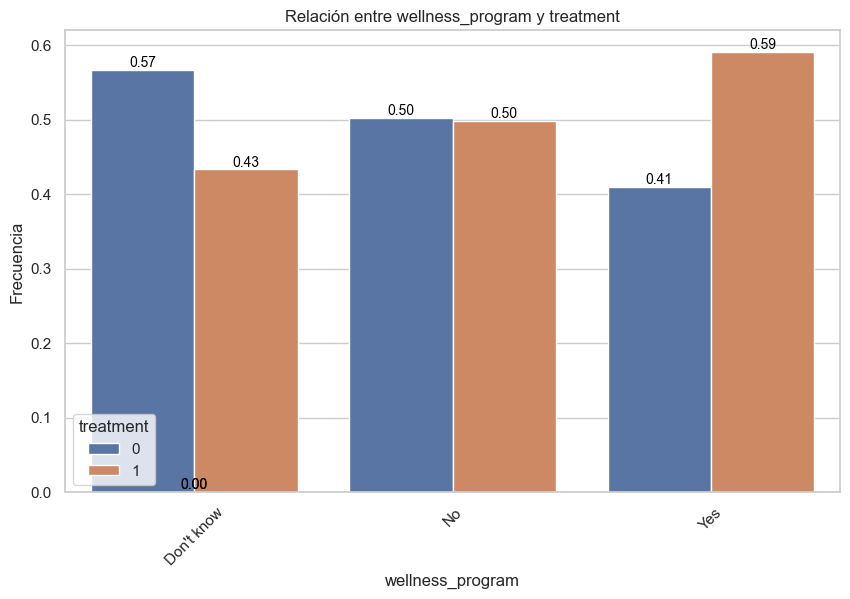

In [27]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="wellness_program", cat_col2="treatment", relative_freq=True, show_values=True)

`wellness_program`\
En este caso parece haber una relación positiva entre disponer de un programa de bienestar y haber recibido tratamiento, aunque la diferencia no es tan extrema como en variables anteriores, pero sigue siendo relevante (16% de diferencia entre *Don’t know* y *Yes*).
Aunque no parece afectar tan notablemente, creo que puede estar bien incluirla, pues sigue habiendo correlación.

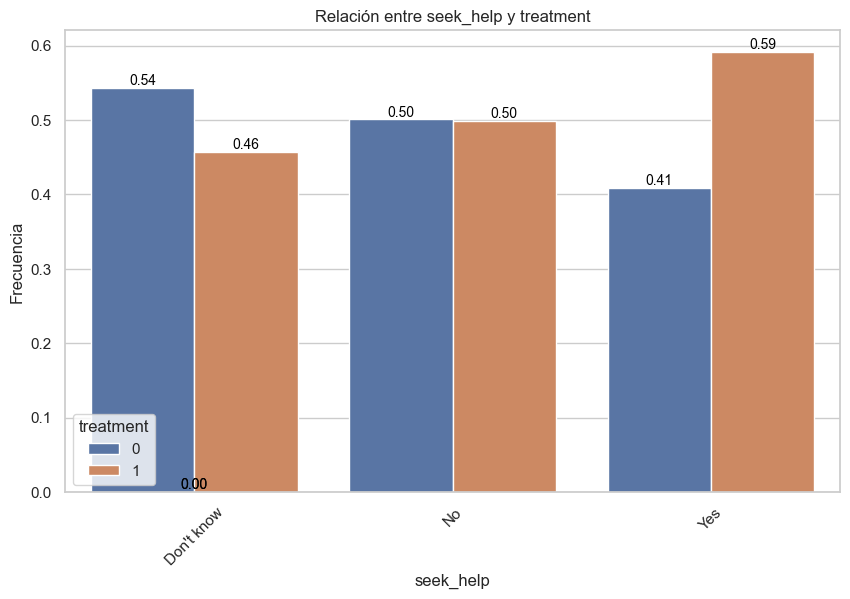

In [28]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="seek_help", cat_col2="treatment", relative_freq=True, show_values=True)

`seek_help`\
Tener claridad sobre cómo y dónde pedir ayuda parece claro que debería asociarse con mayor tasa de tratamiento, lo cual, observando la gráfica, podemos corroborarlo:
- *Yes* destaca con 59% tratados frente a 46–50% del resto.
- *No* y *Don't know* se comportan de forma bastante parecida.

Aunque no son tan grandes las diferencias, me parece una variable muy significativa y coherente a la hora de modelar, nos quedaremos con ella.

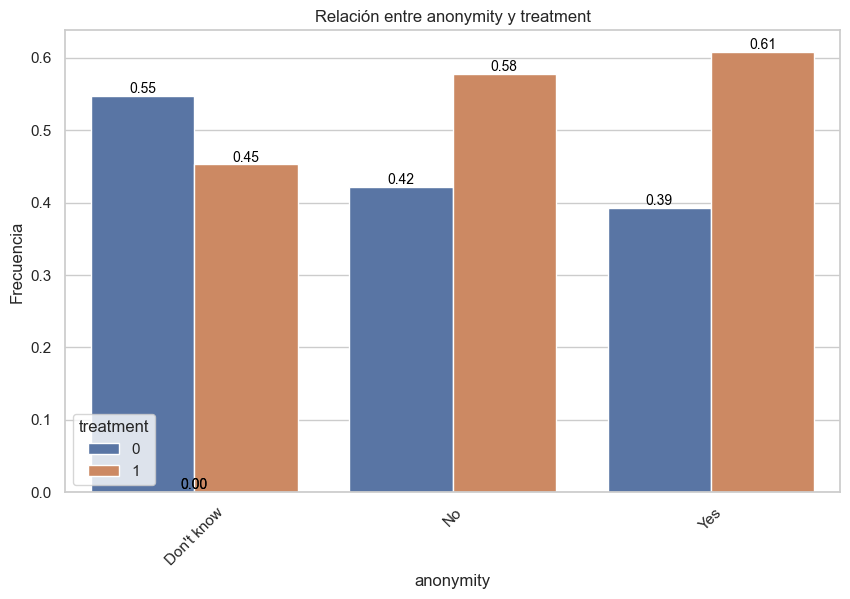

In [29]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="anonymity", cat_col2="treatment", relative_freq=True, show_values=True)

`anonymity`\
Me resultan sorprendentes estos resultados, esperaba diferencias más marcadas. Sí, a mayor percepción de protección del anonimato, mayor probabilidad de haber recibido tratamiento, pero *Yes* y *No* están muy cerca, más de lo esperado. Donde realmente baja la tasa es para *Don't know*. Esto puede reflejar que la sensación de seguridad (o inseguridad) influye en la decisión de buscar ayuda. Aunque no sea tan determinante como creíamos, sigue discriminando, nos la quedaremos también.

---

**Bloque 4: Consecuencias y barreras percibidas**

Otro grupo de variables clave para entender si la percepción del riesgo y estabilidad laboral influye a la hora de buscar tratamiento. Nos centraremos en `leave`, `mental_health_consequence`, `phys_health_consequence` y `obs_consequence`.

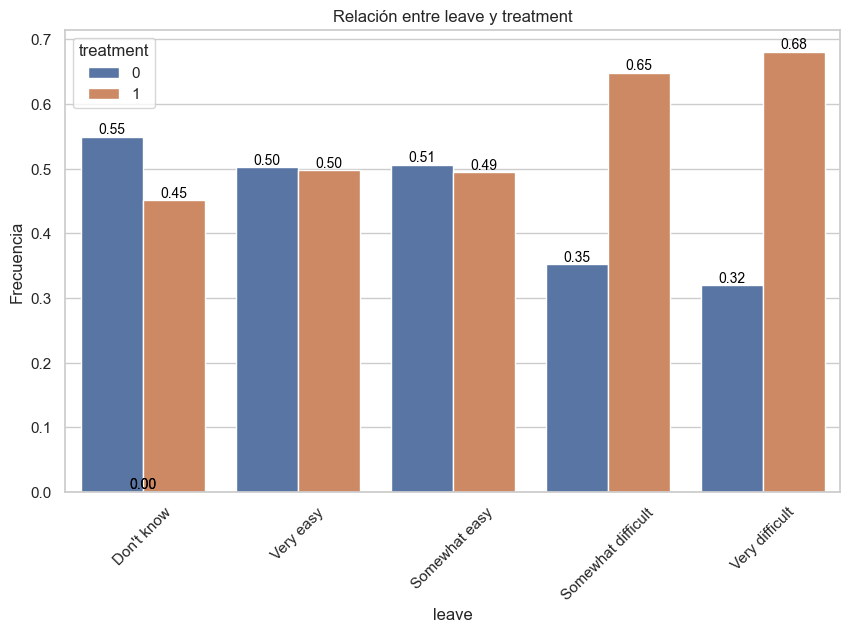

In [30]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="leave", cat_col2="treatment", relative_freq=True, show_values=True)

`leave`\
Puede parecer contraintuitivo al principio, y es que segun la gráfica, quienes tienen más dificultades para pedir baja tienen una mayor tasa de tratamiento. Pero, pensándolo un poco, puede que sean precisamente quienes tienen problemas más graves o quienes han tenido que buscar ayuda externa (porque su entorno laboral no se la facilita) los que hayan encontrado estas dificultades que reflejan en la encuesta. En cualquier caso, tiene valor predictivo, así que es interesante para el modelo.

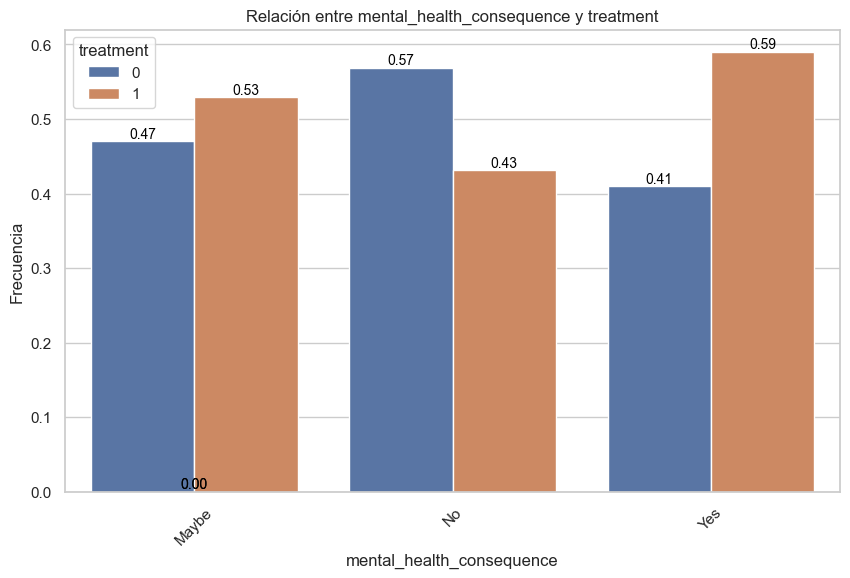

In [31]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="mental_health_consequence", cat_col2="treatment", relative_freq=True, show_values=True)

`mental_health_consequence`\
Esta es tan clara como podíamos esperar: cuanto mayor es la percepción de haber sufrido consecuencias por padecer problemas mentales en el trabajo, más alta es la tasa de tratamiento. Esto refuerza la idea que comentábamos antes: quienes ya han recibido tratamiento son más conscientes de las barreras que esto te genera o, dicho de otro modo, quienes perciben consecuencias son precisamente los que han recibido tratamiento.

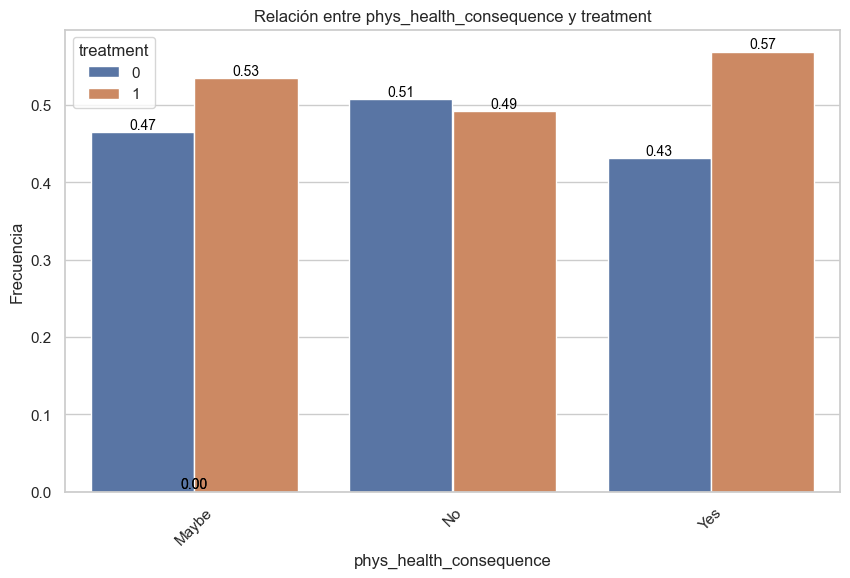

In [32]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="phys_health_consequence", cat_col2="treatment", relative_freq=True, show_values=True)

`phys_health_consequence`\
Aquí también hay una tendencia, aunque no tan clara como con en caso de las enfermedades mentales:
- *Yes* y *Maybe* tienen algo más de tasa de tratamiento que *No*, pero las diferencias son más pequeñas.

Esto parece reflejar el clásico estigma que hay respecto a las empresas en cuanto a que "toman más en serio" una dolencia o enfermedad física diagnosticada que una enfermedad mental.

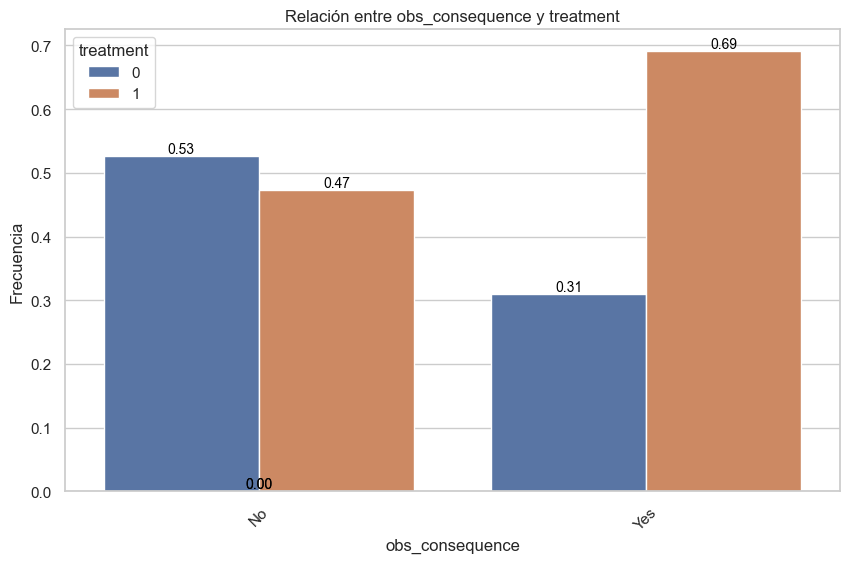

In [33]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="obs_consequence", cat_col2="treatment", relative_freq=True, show_values=True)

`obs_consequence`\
Observamos una segmentación clarísima: quienes han observado consecuencias negativas en otros tienen una tasa de tratamiento muy superior, lo cual podría indicar que han vivido entornos problemáticos donde otros también tuvieron que buscar ayuda y, o bien han aprendido del ejemplo ajeno, o bien anticipan con miedo el mismo riesgo para sí mismos al encontrarse en una situación similar. Variable muy útil.

---

**Bloque 5: Entorno interpersonal y entrevistas**

En este último bloque nos centraremos en las relaciones interpersonales en el trabajo y la percepción que se tiene a la hora de tratar estos temas en entrevistas, variables que también pueden influir mucho. Agrupamos aquí `coworkers`, `supervisor`, `mental_health_interview`, `phys_health_interview` y `mental_vs_physical`.

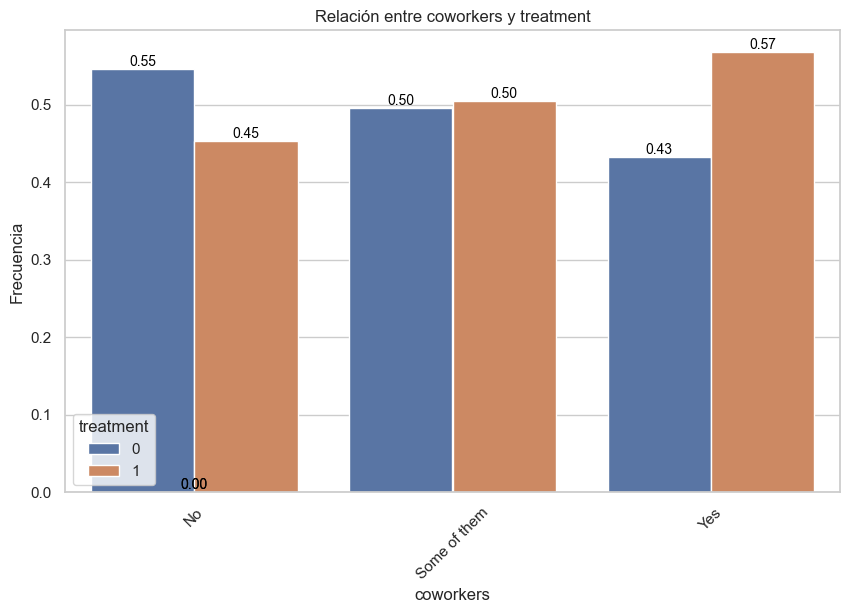

In [34]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="coworkers", cat_col2="treatment", relative_freq=True, show_values=True)

`coworkers`\
Cuanto más abierta es la persona a hablar con sus compañeros, más alta la probabilidad de haber recibido tratamiento. Relación lineal moderada, dentro de lo esperado. Buena variable a mantener.

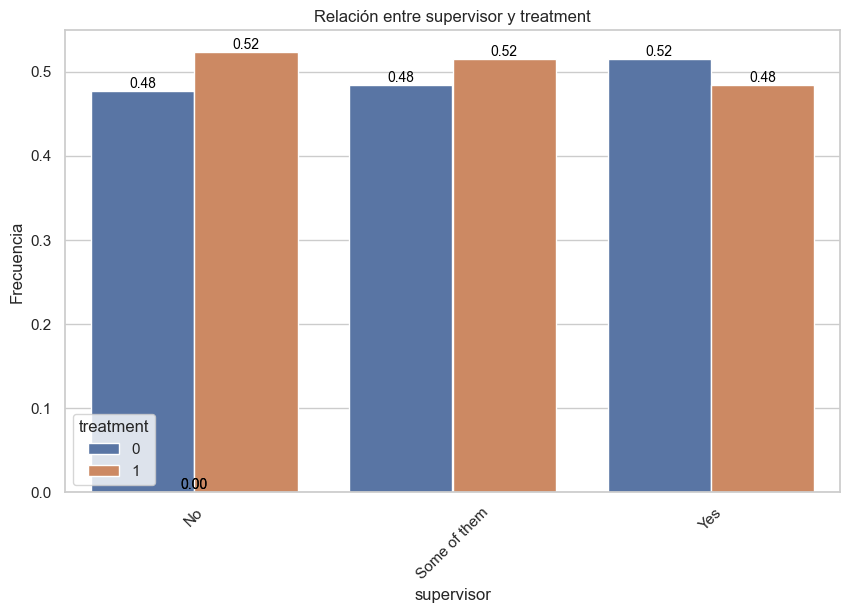

In [35]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="supervisor", cat_col2="treatment", relative_freq=True, show_values=True)

`supervisor`\
A diferencia de la anterior, en este caso no hay una tendencia clara, todos los pocentajes están alrededor del 50%. Puede que la decisión de tratarse no dependa tanto de la relación con superiores, por miedo o menor confianza con ellos. Es decir, podríamos decir que una persona, si lo necesita, va a recibir tratamiento por salud mental independientemente de si lo ha comentado con algún superior o no. Parece ser una candidata clara a descartar.

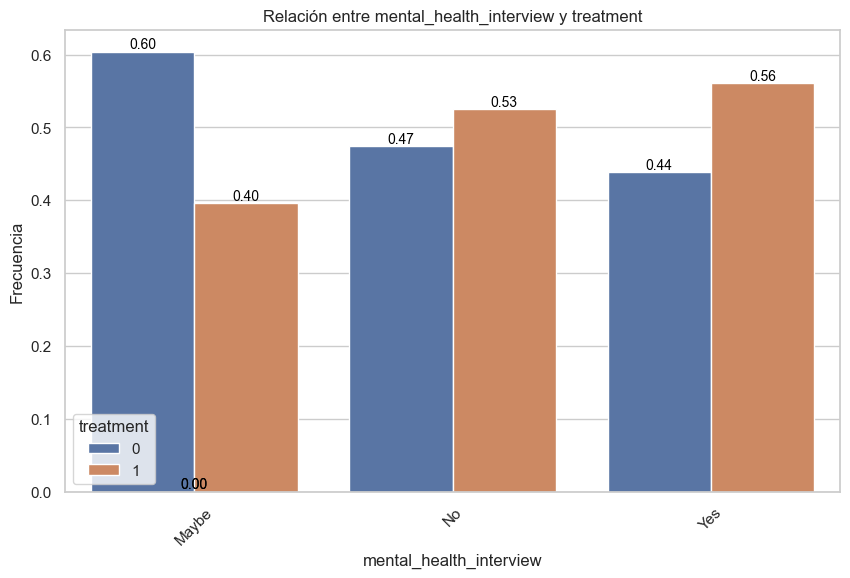

In [36]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="mental_health_interview", cat_col2="treatment", relative_freq=True, show_values=True)

`mental_health_interview`\
De nuevo nos encontramos con una variable similar a algunas de las que ya hemos tratado. Aunque no hay una gran diferencia entre el *Yes* y el *No*, lo que si es significativo es que los que tienen más claro que sí lo dirían (o no lo harían) tienen mayor tasa de tratamiento. Son precisamente los *Maybe* los que están significativamente por debajo (40%), lo cual refleja inseguridad o el estigma percibido en el mundo laboral del que hablábamos. Podemos sacar un posible patrón útil para modelar: a mayor definición y transparencia, mayor probabilidad de haber recibido tratamiento.

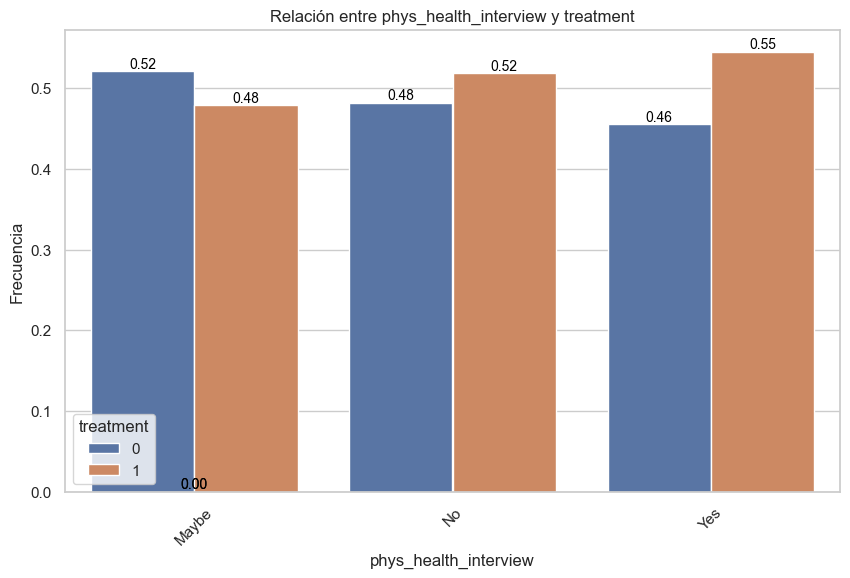

In [37]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="phys_health_interview", cat_col2="treatment", relative_freq=True, show_values=True)

`phys_health_interview`\
Al igual que con la variable que medía las consecuencias percibidas, las diferencias aquí también son menores que en la versión mental, aunque sigue habiendo un patrón leve. En general, hay cierta reticencia a mencionar cualquier problema de salud, pero en este caso no es tan relevante como en el mental.

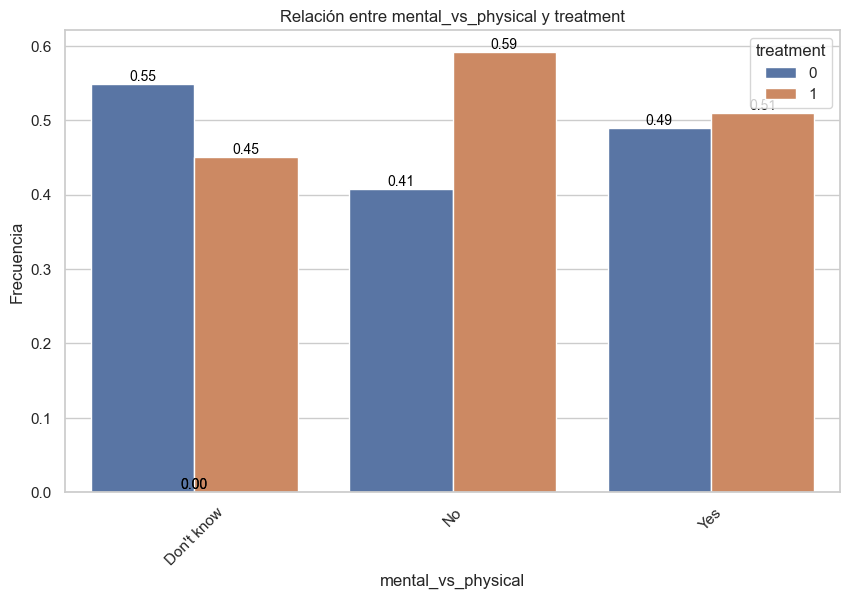

In [38]:
bt.plot_categorical_relationship_fin(df_modificable, cat_col1="mental_vs_physical", cat_col2="treatment", relative_freq=True, show_values=True)

`mental_vs_physical`\
Esta variable trata precisamente la discusión que comentábamos en las variables que comparaban consecuencias y predisposición a mencionar enfermedades físicas vs mentales. Quienes opinan que la empresa no trata igual ambos temas tienen la mayor tasa de tratamiento, como podíamos esperar. Esto puede indicar que los más críticos o conscientes de la desigualdad son también quienes buscan o han necesitado más ayuda.

---
---

## 5.- Feature engineering

En esta sección seleccionaremos las variables que se utilizarán como features (`X`) y la variable objetivo (`y`), y aplicaremos las transformaciones necesarias para preparar los datos antes del modelado.

---

### 5.1- Selección de features



La variable objetivo, como ya dijimos antes, es `treatment`, que indica si la persona ha recibido tratamiento por un problema de salud mental (1) o no (0).

La selección de features la hemos hecho basándonos en las conclusiones obtenidas del EDA. Siendo así, se han seleccionado variables teniendo en cuenta:
- Su potencial valor predictivo (relaciones claras con el target).
- Su coherencia con el objetivo del estudio: comprender el impacto del entorno laboral sobre la salud mental.

Por tanto, nuestras elegidas son las siguientes:
- **Variable numérica:** `age`
- **Variables ordinales:** `work_interfere`, `leave`, `no_employees_encoded`
- **Variables categóricas relevantes:** `gender`, `family_history`, `country_grouped`, `benefits`, `care_options`, `wellness_program`, `seek_help`, `anonymity`, `mental_health_consequence`, `phys_health_consequence`, `obs_consequence`, `coworkers`, `mental_health_interview`, `phys_health_interview`, `mental_vs_physical`

---

### 5.2- Transformaciones y separación X, y

Con el objetivo de preparar correctamente los datos para distintos tipos de modelos, aplicamos dos tipos de transformaciones:

**Codificación de variables categóricas**

A las variables categóricas (excepto a las ordinales, ya tratadas) las aplicaremos un **One-Hot Encoding**, eliminando la primera categoría de cada una para evitar multicolinealidad.

**Escalado de variables numéricas**

La única variable numérica continua, `age`, la escalaremos con **StandardScaler** para centrarla en media 0 y desviación típica 1. Este tipo de transformación es vital para modelos que son sensibles a la escala (como regresión logística o KNN), pero innecesario para modelos basados en árboles (como Random Forest o XGBoost). 

Por tanto, para un trabajo óptimo, crearemos dos versiones de `X`:

- `X_raw`:  
  - Incluye OneHotEncoding.
  - No escala `Age`.
  - Útil para modelos basados en **árboles**.

- `X_scaled`:  
  - Incluye OneHotEncoding  
  - `Age` escalada con StandardScaler**.
  - Útil para **regresión logística o KNN**

En ambos casos, las variables ordinales (`work_interfere`, `leave`, `no_employees_encoded`) se mantienen como están, ya que conservan su orden semántico y pueden ser interpretadas directamente por los modelos.

In [39]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Separamos las features por tipo
ordinales = ["work_interfere", "leave", "no_employees_encoded"]
numericas = ["age"]
categoricas = [
    "gender", "family_history", "country_grouped", "benefits", "care_options",
    "wellness_program", "seek_help", "anonymity", "mental_health_consequence",
    "phys_health_consequence", "obs_consequence", "coworkers",
    "mental_health_interview", "phys_health_interview", "mental_vs_physical"
]

# Convertimos las ordinales a códigos numéricos para evitar errores al ejecutar los modelos
df_modificable["leave"] = df_modificable["leave"].cat.codes
df_modificable["work_interfere"] = df_modificable["work_interfere"].cat.codes

# Separamos X e y
X = df_modificable[ordinales + numericas + categoricas].copy()
y = df_modificable["treatment"]

# OneHotEncoder para las categóricas
ohe = OneHotEncoder(drop="first", sparse_output=False)

# Versión 1: sin escalar `age`

# Instanciamos el transformador
pre_no_scaling = ColumnTransformer([
    ("cat", ohe, categoricas)
], remainder="passthrough")

X_no_scaling = pre_no_scaling.fit_transform(X)  # Lo aplicamos a X
col_cat = pre_no_scaling.named_transformers_["cat"].get_feature_names_out(categoricas)  # Para extraer los nombres de las columnas generadas con ohe
columnas_finales_no_scaling = list(col_cat) + ordinales + numericas
X_raw = pd.DataFrame(X_no_scaling, columns=columnas_finales_no_scaling)

# Versión 2: escalada (OneHot + StandardScaler en Age)
pre_scaling = ColumnTransformer([
    ("num", StandardScaler(), numericas),
    ("cat", ohe, categoricas)
], remainder="passthrough")

X_scaled = pre_scaling.fit_transform(X)
col_cat = pre_scaling.named_transformers_["cat"].get_feature_names_out(categoricas)
columnas_finales_escalada = list(col_cat) + ordinales + numericas
X_scaled = pd.DataFrame(X_scaled, columns=columnas_finales_escalada)

---

### 5.3- Train-test split

In [40]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y, test_size=0.2, stratify=y, random_state=42)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

---
---

## 6.- Baseline

### 6.1.- Modelado: Regresión logística

Vamos a comenzar el modelado con una **regresión logística simple**, que servirá como modelo base para comparar con futuros modelos más complejos.

Usamos en este caso la versión de los datos con `age` escalado (`X_scaled`) ya que este tipo de modelo es sensible a la escala de las variables.

De momento no ajustaremos hiperparámetros, pues el objetivo es simplemente obtener una primera referencia de desempeño.

In [41]:
from sklearn.linear_model import LogisticRegression

# Instanciamos y entrenamos el modelo base
baseline = LogisticRegression(max_iter=1000, random_state=42)
baseline.fit(X_train_scaled, y_train_scaled)

# Predicciones sobre test
y_pred_base = baseline.predict(X_test_scaled)

In [42]:
import joblib

# Guardamos nuestro baseline
joblib.dump(baseline, "./src/models/logreg_mental_health.pkl")

['./src/models/logreg_mental_health.pkl']

---

### 6.2.- Evaluación

Ahora que hemos entrenado nuestro baseline, vamos a evaluar su rendimiento en el conjunto de test utilizando varias métricas:

- **Accuracy**: proporción global de aciertos.
- **Precision**: qué porcentaje de las predicciones positivas fueron correctas.
- **Recall**: qué porcentaje de los positivos reales fueron correctamente identificados.
- **F1 Score**: media armónica entre precision y recall.
- **Matriz de confusión**: para visualizar aciertos y errores por clase.

Estas métricas nos permitirán obtener una primera visión general del desempeño del modelo y poder comparar más adelante con modelos más potentes y optimizados.

Accuracy:  0.8287
Precision: 0.8281
Recall:    0.8346
F1 Score:  0.8314


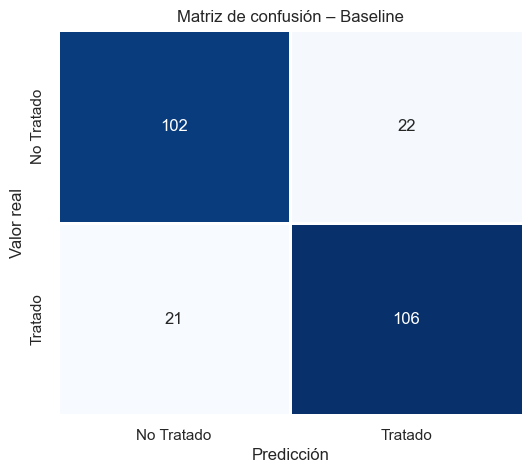

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Métricas
acc = accuracy_score(y_test_scaled, y_pred_base)
prec = precision_score(y_test_scaled, y_pred_base)
rec = recall_score(y_test_scaled, y_pred_base)
f1 = f1_score(y_test_scaled, y_pred_base)

# Mostramos los resultados
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test_scaled, y_pred_base)
labels = np.array([["TN", "FP"], ["FN", "TP"]])

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Tratado", "Tratado"], yticklabels=["No Tratado", "Tratado"], cbar=False, linewidths=1, linecolor="white")
plt.title("Matriz de confusión – Baseline")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

Nuestro baseline, el modelo de regresión logística, ha ofrecido un rendimiento bastante notable como punto de partida, con una **accuracy del 82,9%**, **precision del 83,3%**, y **recall del 82,7%**, lo que indica un buen equilibrio entre la detección de personas que han recibido tratamiento y la precisión al identificarlas. 

La **matriz de confusión** muestra que los errores tipo I y II están bien distribuidos, lo cual sugiere que el modelo no está sesgado hacia una clase concreta. Siendo un modelo lineal y sin ajuste de hiperparámetros, estos resultados son positivos y servirán como una referencia sólida para comparar con algoritmos más complejos y optimizados.

---
---

## 7.- Modelos avanzados

Teniendo ya nuestro baseline de partida, pasamos ahora a entrenar varios modelos avanzados utilizando técnicas de validación cruzada y ajuste de hiperparámetros con el objetivo de encontrar el mejor clasificador posible. Para ello, cada modelo tendrá su propio subapartado, incluyendo:

- Breve justificación.
- Selección y ajuste de hiperparámetros (GridSearchCV).
- Evaluación de métricas (accuracy, precision, recall, F1, matriz de confusión).

Los modelos que estudiaremos son:

- `7.1` Random Forest
- `7.2` XGBoost
- `7.3` Gradient Boosting  
- `7.4` K-Nearest Neighbors (KNN)

Utilizaremos la versión adecuada de `X` que sea necesaria:
- Modelos basados en árboles → `X_raw`
- Modelos sensibles a la escala → `X_scaled`

Para cada caso, optimizaremos los hiperparámetros que apliquen en un notebook de pruebas usando validación cruzada de 5 folds, encontrando el mejor modelo para cada ensamblado, que será el que mostraremos aquí.

---

### 7.1.- Random Forest

Random Forest es un ensamblado de árboles de decisión que ofrece una buena capacidad de generalización y robustez frente al overfitting. A diferencia del modelo base, puede capturar relaciones no lineales entre variables y manejar interacciones complejas sin necesidad de escalado.

Por ello, utilizaremos `X_raw`, sin escalar, y aplicaremos un `GridSearchCV` para encontrar la mejor combinación de hiperparámetros.  
Estos hiperparámetros serán:

- `n_estimators`: número de árboles.
- `max_depth`: profundidad máxima de cada árbol.
- `min_samples_split`: mínimo de muestras para dividir un nodo.
- `min_samples_leaf`: tamaño mínimo de hoja (mejora estabilidad).
- `max_features`: número de features a considerar por split.
- `bootstrap`: para evaluar con y sin remuestreo.

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Instanciamos el modelo
rf = RandomForestClassifier(random_state=42)

# Hiperparámetros optimizados
param_grid = {
    "n_estimators": [100],
    "max_depth": [None],
    "min_samples_split": [5],
    "min_samples_leaf": [1],
    "max_features": ["log2"],
    "bootstrap": [True]
}

# GridSearch con validación cruzada
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)

# Entrenamos
grid_rf.fit(X_train_raw, y_train_raw)

# Guardamos el mejor modelo
best_rf = grid_rf.best_estimator_

# Predecimos
y_pred_rf = best_rf.predict(X_test_raw)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [45]:
# Guardamos el Random Forest
joblib.dump(best_rf, "./src/models/rf_mental_health.pkl")

['./src/models/rf_mental_health.pkl']

Accuracy:  0.8367
Precision: 0.8028
Recall:    0.8976
F1 Score:  0.8476


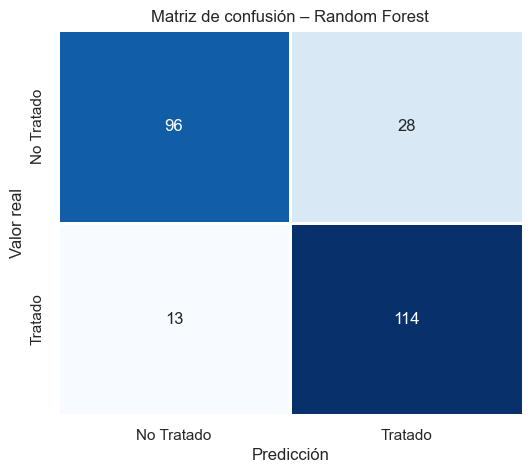

In [46]:
# Métricas
acc_rf = accuracy_score(y_test_raw, y_pred_rf)
prec_rf = precision_score(y_test_raw, y_pred_rf)
rec_rf = recall_score(y_test_raw, y_pred_rf)
f1_rf = f1_score(y_test_raw, y_pred_rf)

# Mostramos los resultados
print(f"Accuracy:  {acc_rf:.4f}")
print(f"Precision: {prec_rf:.4f}")
print(f"Recall:    {rec_rf:.4f}")
print(f"F1 Score:  {f1_rf:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test_raw, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Tratado", "Tratado"],
            yticklabels=["No Tratado", "Tratado"],
            cbar=False, linewidths=1, linecolor="white")
plt.title("Matriz de confusión – Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

---

### 7.2.- XGBoost

XGBoost es un modelo de boosting basado en árboles de decisión que construye secuencialmente predictores, cada uno aprendiendo de los errores cometidos por el anterior. Es conocido por su alto rendimiento en competiciones y por ofrecer un control detallado sobre el ajuste del modelo.

Al igual que en el modelo anterior, utilizaremos `X_raw`, sin escalar, y aplicaremos un `GridSearchCV` para encontrar la mejor combinación de hiperparámetros.

Estos hiperparámetros serán:

- `n_estimators`: número total de árboles en el ensamblado.
- `max_depth`: profundidad máxima de cada árbol.
- `learning_rate`: velocidad de aprendizaje con la que se ajustan los errores.
- `subsample`: fracción de datos utilizada para construir cada árbol (para controlar el overfitting).
- `colsample_bytree`: fracción de variables seleccionadas aleatoriamente por árbol.
- `gamma`: ganancia mínima necesaria para realizar una partición en un nodo.

In [47]:
from xgboost import XGBClassifier

# Instanciamos el modelo
xgb = XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=42)

# Hiperparámetros optimizados
param_grid = {
    "n_estimators": [250],
    "max_depth": [3],
    "learning_rate": [0.02],
    "subsample": [1.0],
    "colsample_bytree": [1.0],
    "gamma": [0.05]
}

# GridSearch con validación cruzada
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    verbose=1,
    n_jobs=-1
)

# Entrenamos
grid_xgb.fit(X_train_raw, y_train_raw)

# Guardamos el mejor modelo
best_xgb = grid_xgb.best_estimator_

# Predecimos
y_pred_xgb = best_xgb.predict(X_test_raw)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [48]:
# Guardamos el xgb
joblib.dump(best_xgb, "./src/models/xgb_mental_health.pkl")

['./src/models/xgb_mental_health.pkl']

Accuracy:   0.8367
Precisión:  0.7945
Recall:     0.9134
F1 Score:   0.8498


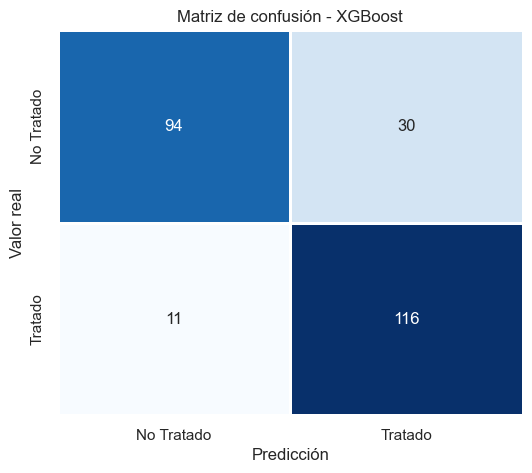

In [49]:
# Métricas
acc_xgb = accuracy_score(y_test_raw, y_pred_xgb)
prec_xgb = precision_score(y_test_raw, y_pred_xgb)
rec_xgb = recall_score(y_test_raw, y_pred_xgb)
f1_xgb = f1_score(y_test_raw, y_pred_xgb)

# Mostramos los resultados
print(f"Accuracy:   {acc_xgb:.4f}")
print(f"Precisión:  {prec_xgb:.4f}")
print(f"Recall:     {rec_xgb:.4f}")
print(f"F1 Score:   {f1_xgb:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test_raw, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Tratado", "Tratado"],
            yticklabels=["No Tratado", "Tratado"],
            cbar=False, linewidths=1, linecolor="white")

plt.title("Matriz de confusión - XGBoost")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

---

### 7.3.- Gradient Boosting

Gradient Boosting es un algoritmo que construye árboles de decisión de forma secuencial, donde cada nuevo árbol intenta corregir los errores cometidos por los anteriores. A diferencia de XGBoost, su implementación en `scikit-learn` es más sencilla y menos regularizada, siendo una opción muy eficaz para problemas de clasificación.

Al igual que en modelos anteriores, utilizaremos `X_raw`, sin escalar, y aplicaremos un `GridSearchCV` para encontrar la mejor combinación de hiperparámetros.

Estos hiperparámetros serán:

- `n_estimators`: número total de árboles en el modelo.
- `max_depth`: profundidad máxima de cada árbol.
- `learning_rate`: velocidad de aprendizaje en cada iteración.
- `subsample`: fracción de muestras usadas para construir cada árbol.
- `max_features`: número de características consideradas por split.

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

# Instanciamos el modelo base
gbc = GradientBoostingClassifier(random_state=42)

# Hiperparámetros optimizados
param_grid = {
    "n_estimators": [275],
    "max_depth": [4],
    "learning_rate": [0.0075],
    "subsample": [0.9],
    "max_features": ["log2"]
}

# GridSearch con validación cruzada
grid_gbc = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,    
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=1
)

# Entrenamos
grid_gbc.fit(X_train_raw, y_train_raw)

# Guardamos el mejor modelo
best_gbc = grid_gbc.best_estimator_

# Predecimos
y_pred_gbc = best_gbc.predict(X_test_raw)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [51]:
# Guardamos el gbc
joblib.dump(best_gbc, "./src/models/gbc_mental_health.pkl")

['./src/models/gbc_mental_health.pkl']

Accuracy:   0.8486
Precisión:  0.8156
Recall:     0.9055
F1 Score:   0.8582


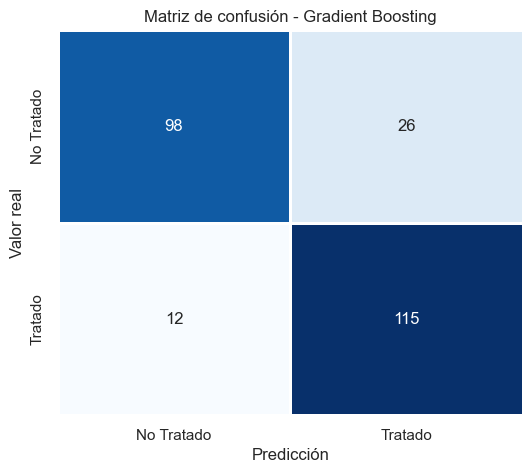

In [52]:
# Métricas
acc_gbc = accuracy_score(y_test_raw, y_pred_gbc)
prec_gbc = precision_score(y_test_raw, y_pred_gbc)
rec_gbc = recall_score(y_test_raw, y_pred_gbc)
f1_gbc = f1_score(y_test_raw, y_pred_gbc)

# Mostramos los resultados
print(f"Accuracy:   {acc_gbc:.4f}")
print(f"Precisión:  {prec_gbc:.4f}")
print(f"Recall:     {rec_gbc:.4f}")
print(f"F1 Score:   {f1_gbc:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test_raw, y_pred_gbc)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Tratado", "Tratado"],
            yticklabels=["No Tratado", "Tratado"],
            cbar=False, linewidths=1, linecolor="white")

plt.title("Matriz de confusión - Gradient Boosting")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

---

### 7.4.- K-Nearest Neighbors (KNN)

K-Nearest Neighbors es un algoritmo de clasificación basado en la similitud entre instancias. Clasifica una nueva observación según la mayoría de clases entre sus $k$ vecinos más cercanos en el espacio de características.

Es un modelo no paramétrico y muy intuitivo, útil como referencia frente a modelos más complejos. Al estar basado en distancias, requiere que las variables estén previamente escaladas, por lo que trabajaremos con `X_scaled`.

Aplicaremos un `GridSearchCV` para encontrar la mejor combinación de hiperparámetros. Estos serán:

- `n_neighbors`: número de vecinos a considerar.
- `weights`: determina si todos los vecinos tienen el mismo peso (`uniform`) o se ponderan por su distancia (`distance`).
- `metric`: métrica de distancia usada. En este caso utilizamos `"minkowski"` como generalización.
- `p`: parámetro asociado a la métrica de Minkowski. Permite alternar entre distancia de Manhattan (`p=1`) y Euclídea (`p=2`).

In [53]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos el modelo base
knn = KNeighborsClassifier()

# Hiperparámetros optimizados
param_grid = {
    "n_neighbors": [27],
    "weights": ["uniform"],
    "metric": ["minkowski"],
    "p": [4]
}

# GridSearch con validación cruzada
grid_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    scoring="f1_macro",
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Entrenamos
grid_knn.fit(X_train_scaled, y_train_scaled)

# Guardamos el mejor modelo
best_knn = grid_knn.best_estimator_

# Predecimos
y_pred_knn = best_knn.predict(X_test_scaled)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [54]:
# Guardamos el xgb
joblib.dump(best_knn, "./src/models/knn_mental_health.pkl")

['./src/models/knn_mental_health.pkl']

Accuracy:   0.8247
Precisión:  0.7986
Recall:     0.8740
F1 Score:   0.8346


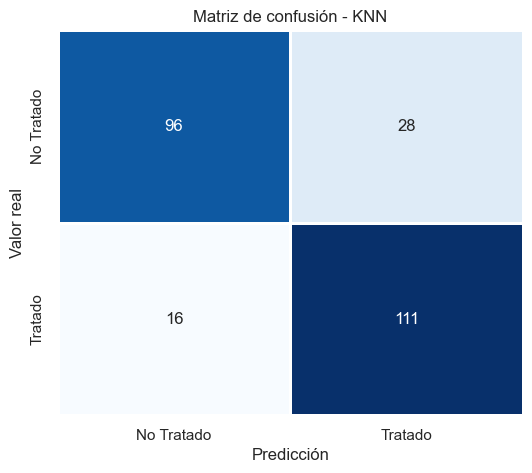

In [55]:
# Métricas
acc_knn = accuracy_score(y_test_raw, y_pred_knn)
prec_knn = precision_score(y_test_raw, y_pred_knn)
rec_knn = recall_score(y_test_raw, y_pred_knn)
f1_knn = f1_score(y_test_raw, y_pred_knn)

# Mostramos los resultados
print(f"Accuracy:   {acc_knn:.4f}")
print(f"Precisión:  {prec_knn:.4f}")
print(f"Recall:     {rec_knn:.4f}")
print(f"F1 Score:   {f1_knn:.4f}")

# Matriz de confusión
cm = confusion_matrix(y_test_raw, y_pred_knn)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Tratado", "Tratado"],
            yticklabels=["No Tratado", "Tratado"],
            cbar=False, linewidths=1, linecolor="white")

plt.title("Matriz de confusión - KNN")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

---

### 7.5.- Comparativa de modelos

| Modelo              | Accuracy | Precisión | Recall  | F1 Score |
|---------------------|----------|-----------|---------|----------|
| Baseline            | 0.8287   | 0.8333    | 0.8268  | 0.8300   |
| Random Forest       | 0.8367   | 0.8071    | 0.8898  | 0.8464   |
| XGBoost             | 0.8287   | 0.7917    | 0.8976  | 0.8413   |
| Gradient Boosting   | 0.8446   | 0.8143    | 0.8976  | 0.8539   |
| KNN                 | 0.8287   | 0.8000    | 0.8819  | 0.8390   |


**Conclusiones**

A la vista de los resultados, podemos extraer las siguientes conclusiones:

- **Gradient Boosting** obtiene el mejor **F1 Score**, la mejor **accuracy**, un excelente **recall**, también el más alto empatado con XGBoost y una muy buena **precisión**, la segunda mejor.
- El **regresor logístico**, aunque presenta una **precisión** ligeramente mayor, la mejor de todas, obtiene un **F1 Score** por debajo de todos los modelos avanzados. Esto indica que su rendimiento es aceptable, y más siendo nuestro modelo base, pero se ve superado por todos los ensamblados, como era de esperar.
- **Random Forest** y **XGBoost** ofrecen resultados muy competitivos, con un muy buen **recall** pero con **precisión** algo más baja, lo que reduce ligeramente su F1.
- El modelo **KNN**, aunque conceptualmente más simple, logra un **F1 Score** bastante decente, mostrando un buen equilibrio entre métricas y comportamiento estable. No son malos resultados pero es peor que los demás modelos en casi todo.

En base a todo esto, el modelo elegido es, claramente, **Gradient Boosting**.

---
---

## 8.- Técnicas avanzadas de mejora y análisis del modelo

En esta sección aplicaremos técnicas adicionales para optimizar, simplificar e interpretar el modelo que hemos seleccionado. El objetivo en este caso es comprobar si es posible mantener (o incluso mejorar) el rendimiento reduciendo la complejidad del modelo o comprendiendo mejor su comportamiento.

---

### 8.1.- Análisis de importancia de variables

El modelo Gradient Boosting permite obtener directamente la importancia relativa de cada variable predictora a través del atributo `.feature_importances_`.

Este análisis nos permite:
- Detectar qué variables son más influyentes en la predicción.
- Evaluar la posibilidad de eliminar variables con muy poca relevancia.
- Explorar versiones simplificadas del modelo utilizando solo las variables más importantes.

Para empezar, mostramos un gráfico con las variables más relevantes ordenadas por importancia:

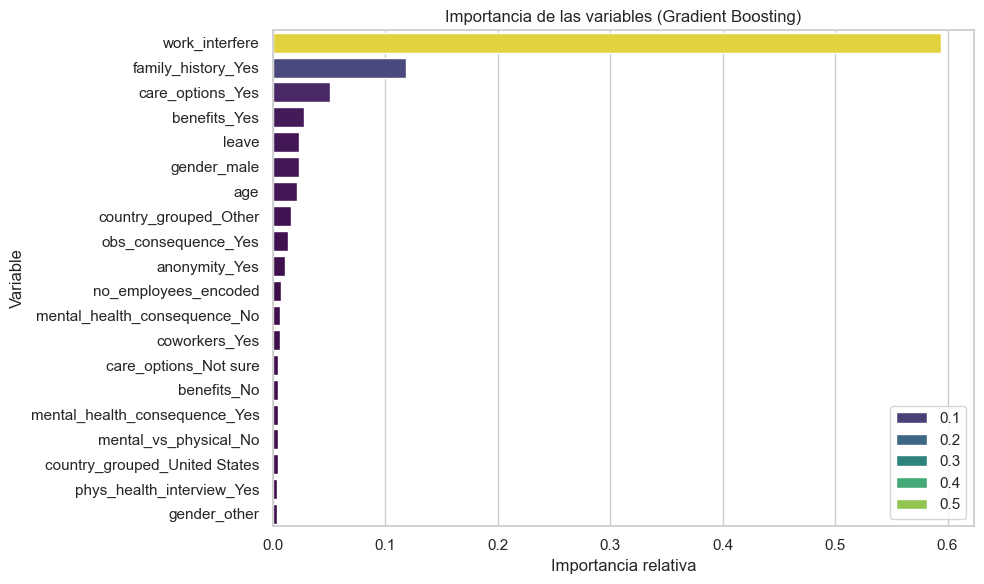

In [56]:
importances = best_gbc.feature_importances_
feature_names = X_train_raw.columns

# Creamos el Dataframe de features ordenado
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

# Visualización de las 20 más importantes
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.head(20), x="importance", y="feature", hue = "importance", palette="viridis")
plt.title("Importancia de las variables (Gradient Boosting)")
plt.xlabel("Importancia relativa")
plt.ylabel("Variable")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

Ahora que hemos identificado las variables más relevantes, vamos a evaluar el rendimiento del modelo utilizando únicamente las $n$ variables más importantes (para distintos valores de $n$). 

El objetivo es encontrar un equilibrio entre simplicidad del modelo y rendimiento predictivo. Para ello, vamos a reentrenar nuestro modelo **Gradient Boosting** usando únicamente las $n$ variables más influyentes y calcularemos las métricas correspondientes para comparar.

In [57]:
# Lista para ir guardando los resultados
results = []

# Bucle para ir probando los modelos con n features
for n in range(1, len(feat_imp) + 1, 2): 
    top_features = feat_imp["feature"].head(n).tolist()

    # Los conjuntos X adaptados a las features elegidas
    X_train_top = X_train_raw[top_features]
    X_test_top = X_test_raw[top_features]

    # Entrenamos con los hiperparámetros óptimos de antes
    model = GradientBoostingClassifier(
        learning_rate=0.0075,
        max_depth=4,
        max_features="log2",
        n_estimators=275,
        subsample=0.9,
        random_state=42
    )
    model.fit(X_train_top, y_train_raw)
    y_pred = model.predict(X_test_top)

    # Guardamos las métricas en la lista
    results.append({
        "n_features": n,
        "accuracy": accuracy_score(y_test_raw, y_pred),
        "precision": precision_score(y_test_raw, y_pred),
        "recall": recall_score(y_test_raw, y_pred),
        "f1": f1_score(y_test_raw, y_pred)
    })

# Lo guardamos en un DataFrame
results_df = pd.DataFrame(results)

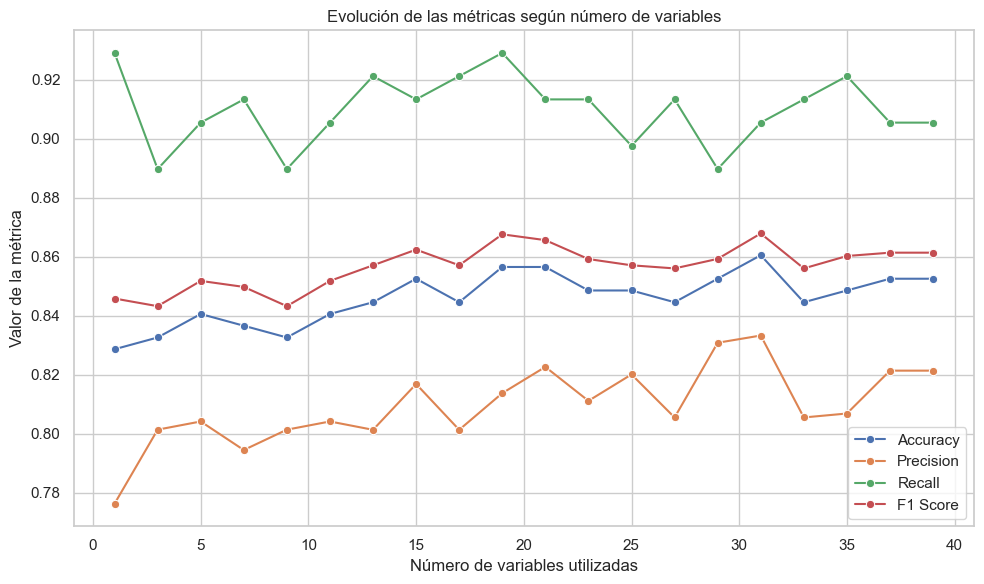

In [58]:
plt.figure(figsize=(10, 6))

# Dibujamos cada métrica como una línea uniendo puntos
sns.lineplot(data=results_df, x="n_features", y="accuracy", marker="o", label="Accuracy")
sns.lineplot(data=results_df, x="n_features", y="precision", marker="o", label="Precision")
sns.lineplot(data=results_df, x="n_features", y="recall", marker="o", label="Recall")
sns.lineplot(data=results_df, x="n_features", y="f1", marker="o", label="F1 Score")

# Maquetamos el gráfico
plt.title("Evolución de las métricas según número de variables")
plt.xlabel("Número de variables utilizadas")
plt.ylabel("Valor de la métrica")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A partir del análisis visual de la evolución de las métricas en función del número de variables utilizadas, observamos lo siguiente:

- El F1 Score alcanza su valor máximo en 15 variables.
- Aumentar el número de variables más allá de ese punto no aporta mejoras significativas e incluso genera pequeñas oscilaciones en el rendimiento.
- Las métricas de precisión, recall y accuracy también muestran una estabilización o ligera caída más allá de dicho umbral.

Por tanto, concluimos que utilizar las **15 variables** más importantes nos permite construir un modelo **más simple, interpretable y eficiente**, sin perder capacidad predictiva.

Esta selección es óptima para el balance entre rendimiento y simplicidad del modelo.

---

### 8.2.- Interpretabilidad del modelo con SHAP

Para comprender cómo el modelo toma sus decisiones y qué impacto tiene cada variable en cada predicción, se emplea **SHAP** (**SH**apley **A**dditive ex**P**lanations).

SHAP permite:
- Obtener una medida precisa de la contribución de cada variable en la predicción individual de un modelo.
- Visualizar explicaciones globales (importancia media de cada variable en el conjunto).

A continuación, mostramos el gráfico global generado a partir del modelo Gradient Boosting entrenado con las 15 variables más relevantes.

PermutationExplainer explainer: 252it [00:44,  5.24it/s]                         


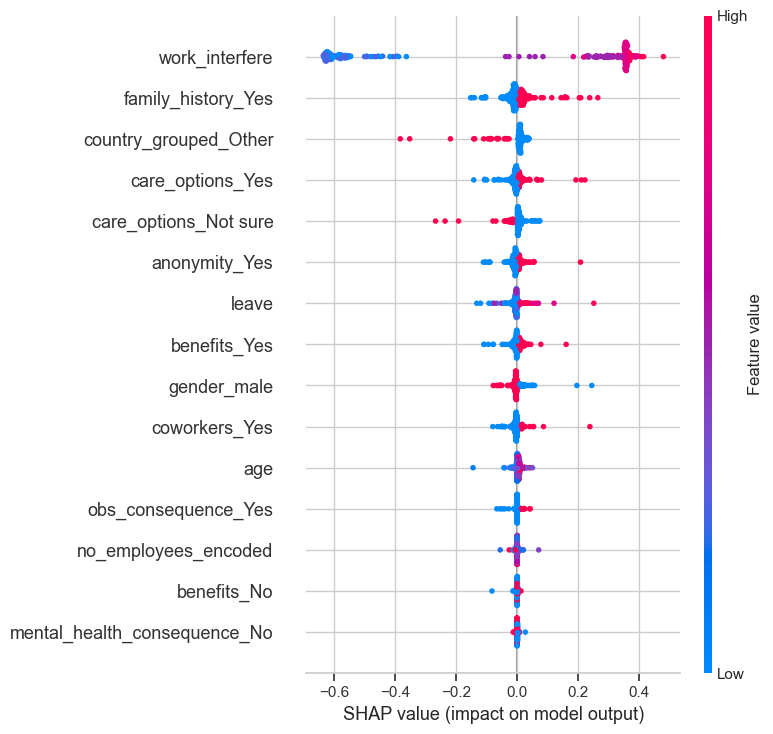

In [59]:
import shap
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Seleccionamos las 15 features más importantes
top15_features = feat_imp["feature"].head(15).tolist()
X_train_15 = X_train_raw[top15_features]
X_test_15 = X_test_raw[top15_features]

# Entrenamiento final con estas 15 variables
model_15 = GradientBoostingClassifier(
    learning_rate=0.0075,
    max_depth=4,
    max_features="log2",
    n_estimators=275,
    subsample=0.9,
    random_state=42
)
model_15.fit(X_train_15, y_train_raw)

# Inicializamos el "explicador" SHAP
explainer = shap.Explainer(model_15.predict, X_train_15)

# Calculamos los valores SHAP sobre el conjunto de test
shap_values = explainer(X_test_15)

# Mostramos el gráfico resumen SHAP
shap.summary_plot(shap_values, X_test_15)

El gráfico de resumen SHAP mostrado representa el impacto de cada una de las 15 variables seleccionadas sobre las predicciones del modelo Gradient Boosting. En el eje vertical vienen ordenadas las variables por su importancia promedio, mientras que en el eje horizontal se muestran los valores SHAP, que indican cuánto contribuye una variable a aumentar o disminuir la probabilidad de que una observación sea clasificada como "Tratado".

Cada punto del gráfico representa un individuo del conjunto de test, y su color indica si el valor de esa variable en ese caso es alto (rojo) o bajo (azul). Cuanto más alejado esté un punto del cero en el eje horizontal, mayor es su efecto sobre la predicción.

Por ejemplo, se observa que la variable `work_interfere` tiene el mayor impacto en el modelo. Valores altos (rojos) de esta variable tienden a desplazar la predicción hacia la clase positiva ("Tratado"), mientras que valores bajos (azules) se asocian con un menor riesgo. También destacan `family_history_Yes` y `country_grouped_Other`, lo que sugiere que tener antecedentes familiares o pertenecer a un país no agrupado entre los top 10 de la encuesta puede aumentar la probabilidad de necesitar tratamiento.

Este tipo de análisis permite no solo entender qué variables son más relevantes, sino también cómo afectan concretamente las decisiones del modelo, lo cual es especialmente importante en contextos sensibles como el de la salud mental.

---
---

## 9.- Modelo final

Tras aplicar múltiples técnicas de optimización, incluyendo ajuste de hiperparámetros, selección de variables por importancia y análisis de interpretabilidad, hemos construido un modelo final de clasificación basado en Gradient Boosting.

Este modelo ha sido entrenado utilizando las 15 variables más relevantes que identificamos mediante el análisis de importancia, y configurado con los hiperparámetros óptimos que obtuvimos a través de validación cruzada.

Para terminar, guardaremos el modelo entrenado para que pueda ser reutilizado fácilmente en futuros contextos, como nuevas encuestas similares o integraciones en herramientas de evaluación automatizada.

In [60]:
# Guardamos el modelo final entrenado
joblib.dump(model_15, "./src/models/optimal_model_mental_health.pkl")

['./src/models/optimal_model_mental_health.pkl']

---
---

## 10.- Conclusiones

Este proyecto ha tenido como objetivo principal la construcción de un modelo predictivo capaz de anticipar si una persona podría necesitar tratamiento para su salud mental, a partir de las respuestas recogidas en una encuesta. A lo largo del trabajo, hemos seguido una metodología completa que incluye análisis exploratorio de los datos (EDA), preparación del dataset, entrenamiento y evaluación de diversos modelos, optimización mediante técnicas avanzadas, y finalmente la interpretación de los resultados.

Entre los distintos algoritmos evaluados, el modelo de **Gradient Boosting con 15 variables** seleccionadas se ha consolidado como el mejor clasificador, tanto en rendimiento (F1 score y precisión), como en interpretabilidad. Hemos ajustado este modelo cuidadosamente con ayuda de validación cruzada y optimización de hiperparámetros mediante GridSearch, lo que garantiza su robustez.

Uno de los principales hallazgos, que, de hecho, va bastante en la línea de lo que podríamos esperar sin realizar ningún análisis, ha sido la importancia de variables como `work_interfere` (grado en el que los problemas de salud mental interfieren con el trabajo según el encuestado), `family_history_Yes` (presencia de antecedentes familiares con problemas de salud mental) o `benefits_Yes` (disponibilidad de recursos en el entorno laboral). También han resultado relevantes relevantes características sociodemográficas como el país de residencia (`country_grouped`), el género y la edad.

El análisis SHAP nos ha permitido comprender de forma detallada cómo cada variable influye en la predicción individual, ofreciendo mucha transparencia al proceso.

Este modelo, aunque entrenado sobre una muestra limitada, podría ser muy útil como herramienta de apoyo para identificar perfiles de riesgo y orientar recursos preventivos en entornos laborales. Su utilidad se basa en la posibilidad de aplicar el modelo a nuevas encuestas estructuradas de forma similar, facilitando la toma de decisiones.

En conclusión, este trabajo demuestra cómo el aprendizaje automático, combinado con una interpretación rigurosa, puede ofrecer resultados valiosos en ámbitos complejos como la salud mental. No solo permite mejorar la detección temprana, sino también visibilizar qué factores afectan más al bienestar psicológico de las personas.